<a href="https://colab.research.google.com/github/vi0908/MC/blob/main/theta_radiov_el%C3%ADptica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***CÁLCULO DE LA ANOMALÍA VERDADERA Y RADIO VECTOR DE UN CUERPO CELESTE EN ÓRBITA ELÍPTICA***



In [ ]:
import datetime
import math

In [ ]:
# DATOS
a = 2.6785123 # en u.a
e = 0.2543422
t_0 = 2453916.5 #tiempo de paso por el perihelio
epoca = 0 #fecha juliana
jd = 2453860.5 #fecha juliana de la fecha en cuestión
Mr = 0 # en grados

# ***FECHA JULIANA***

In [ ]:
# FUNCIÓN PARA LA FECHA JULIANA
def fecha_juliana(fecha):
    year = fecha.year
    month = fecha.month
    day = fecha.day
    hora = fecha.hour
    minuto = fecha.minute
    segundo = fecha.second

    a = int((14 - month) / 12)
    y = year + 4800 - a
    m = month + 12 * a - 3

    # Calcula la fecha Juliana
    jdn = day + int((153 * m + 2) / 5) + 365 * y + int(y / 4) - int(y / 100) + int(y / 400) - 32045

    # Agrega la fracción del día
    fraccion = (hora - 12) / 24 + minuto / 1440 + segundo / 86400
    jd = jdn + fraccion

    return jd


""" ÉPOCA """
tiene_fecha_juliana_epoca = input("\n¿Tiene la fecha juliana de la época en cuestión? (s/n): ")

if tiene_fecha_juliana_epoca == "s":
    # Si tiene la fecha juliana, epoca
    print('\n* época = {}'.format(epoca))

else:
    # Si no tiene la fecha juliana, pedirle los datos necesarios
    año_r = int(input("\naño de referencia = "))
    mes_r = int(input("\nmes de referencia = "))
    dia_r = int(input("\ndía de referencia = "))
    hora_r = int(input("\nhora de referencia = "))
    minuto_r = int(input("\nminuto de referencia = "))
    segundo_r = int(input("\nsegundo de referencia = "))
    fecha_epoca = datetime.datetime(año_r, mes_r, dia_r, hora_r, minuto_r, segundo_r)
    epoca = fecha_juliana(fecha_epoca)
    print('\n* época = {}'.format(epoca))

""" FECHA EN CUESTIÓN """

tiene_fecha_juliana= input("\n¿Tiene la fecha juliana del momento para el que busca hallar las variables? (s/n): ")

if tiene_fecha_juliana == "s":
    # Si tiene la fecha juliana, fecha
    print('\n* fecha = {}'.format(jd))

else:
    # Si no tiene la fecha juliana, pedirle los datos necesarios
    año = input("\naño = ")
    mes = input("\nmes = ")
    dia = input("\ndía = ")
    hora = input("\nhora = ")
    minuto = input("\nminuto = ")
    segundo = input("\nsegundo = ")
    fecha = datetime.datetime(int(año), int(mes), int(dia), int(hora), int(minuto), int(segundo))
    jd = fecha_juliana(fecha)
    print('\n* fecha = {}'.format(jd))

print('\n* t - t_r = {} - {} = {}'.format(jd,epoca, jd - epoca))


¿Tiene la fecha juliana de la época en cuestión? (s/n): N

año de referencia = 2006

mes de referencia = 6

día de referencia = 30

hora de referencia = 0

minuto de referencia = 0

segundo de referencia = 0

* época = 2453916.5

¿Tiene la fecha juliana del momento para el que busca hallar las variables? (s/n): n

año = 2006

mes = 5

día = 5

hora = 0

minuto = 0

segundo = 0

* fecha = 2453860.5

* t - t_r = 2453860.5 - 2453916.5 = -56.0


# ***MOVIMIENTO MEDIO (n)***

In [ ]:
# FUNCIONES PARA EL MOV. MEDIO

def n_sol(longitud_eje_mayor,proporcion):

    """ Calcula el movimiento medio EN GRADOS de un objeto celeste ORBITANDO EL SOL
        ---> La proporción es m2 / m_sol"""
    n = (180/math.pi) * 0.01720209908 * (math.sqrt(1+proporcion)) / a**(3/2)
    return n

def n_masadespreciable_sol(longitud_eje_mayor):

    """ Calcula el movimiento medio EN GRADOS de un objeto celeste de MASA DESPRECIABLE ORBITANDO EL SOL"""

    n = (180/math.pi) * 0.01720209908 / longitud_eje_mayor**(3/2)
    return n

def n_general(longitud_eje_mayor, m1, m2):

    """ Calcula el movimiento medio EN GRADOS de un objeto celeste m2 ORBITANDO m1"""
    n = (180/math.pi) * math.sqrt((6.67e-11 * (86400**2) / (149597870.7e3)**3))* (m1+ m2) / longitud_eje_mayor**(3/2)
    return n



mov_medio_sol = input("\n¿El cuerpo celeste se encuentra orbitando al Sol? (s/n): ")

if mov_medio_sol == "s":
    masa_despreciable = input("\n¿Puede considerarse de masa despreciable? (s/n): ")
    if masa_despreciable == "s":
        n = n_masadespreciable_sol(a)
        print("\n---> Movimiento medio: n = {} º/d".format(n))

    else:
        datos = int(input("\n¿Qué datos tiene?:\n\n  m2 / m_Sol (1) \n\n  m_Sol / m2 (2)\n "))
        if datos == 1:
            proporcion = float(input("\nIngrese m2 / m_Sol: "))
            n = n_sol(a, proporcion)
            print("\n---> Movimiento medio: n = {} º/d".format(n))
        else:
            p = float(input("\nIngrese m_Sol / m2: "))
            proporcion = 1/p
            n = round(n_sol(a, proporcion), 7)
            print("\n---> Movimiento medio: n = {} º/d".format(n))

else:
    m1 = float(input("\ningrese el valor de m1: "))
    m2 = float(input("\ningrese el valor de m2: "))
    n = n_general(a, m1, m2)
    print("\n---> Movimiento medio: n = {} º/d".format(n))


¿El cuerpo celeste se encuentra orbitando al Sol? (s/n): s

¿Puede considerarse de masa despreciable? (s/n): s

---> Movimiento medio: n = 0.22483484001242363 º/d


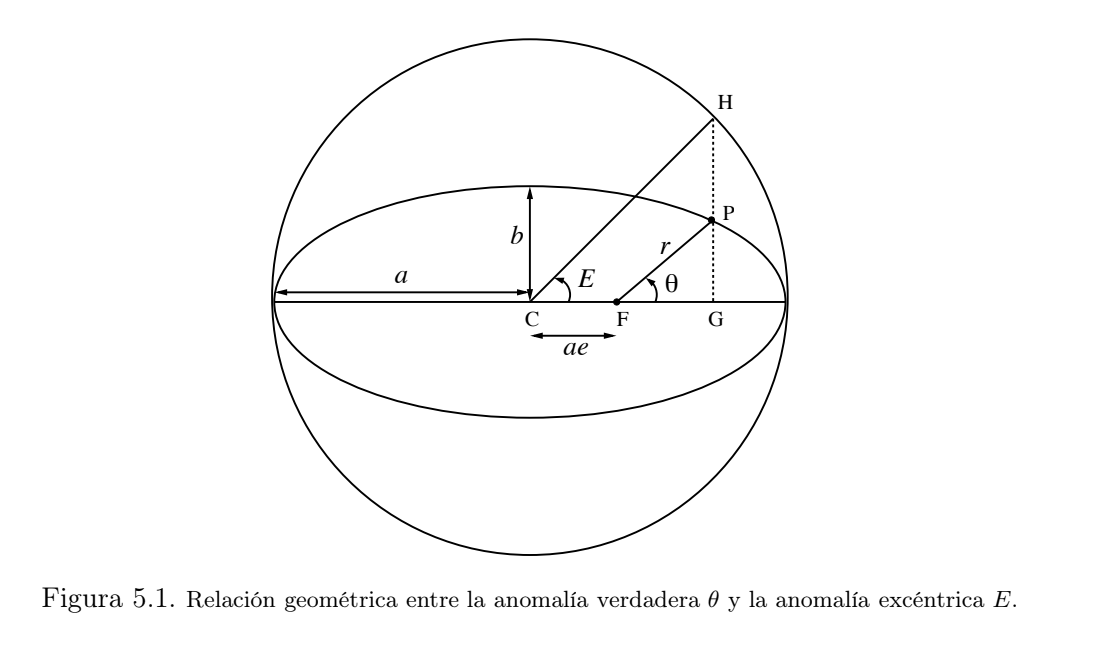

# ***ANOMALÍA MEDIA (M):***


> Generalmente no se aplica el criterio del cuadrante (?).


---

La anomalía media es un ángulo que es función lineal del tiempo y que puede interpretarse como aquel ángulo que indica la posición con respecto al pericentro de un objeto moviéndose sobre la circunferencia (circunscrita en la elipse que representa a la órbita del cuerpo celeste) con velocidad angular constante $n$.

La constante $t_{0}$ (tiempo de paso por el perihelio) que se encontró para un punto específico de la órbita, a saber, para$M = E = \theta = 0$ y $r = q$ (el pericentro), es equivalente a dar un valor arbitrario de
$t$ (llamado $t_r$) para el cual se conoce su correspondiente valor de radio vector o las anomalías correspondientes, o sea, de $r_{r}$ o de $M_{r}$, $E_{r}$ o $\theta_{r}$.



In [ ]:
# ANOMALÍA MEDIA A PARTIR DE UN TIEMPO DE REFERENCIA
M = n * (jd - epoca) + Mr
if M > 360:
    M = M - 360 * math.floor(M/360)
    print('\n---> Anomalía media: M = {}º\n'.format(M))
else:
    print('\n---> Anomalía media: M = {}º\n'.format(M))



In [ ]:
# ANOMALÍA MEDIA A PARTIR DEL TIEMPO DE PASO POR EL PERIHELIO:

M = n * (jd - t_0)


if M > 360:
    M = M - 360 * math.floor(M/360)
    print('\n---> Anomalía media: M = {}º\n'.format(M))
else:
    print('\n---> Anomalía media: M = {}º\n'.format(M))

M



---> Anomalía media: M = -12.590751040695723º



-12.590751040695723

# **CÁLCULO DEL TIEMPO DE PASO POR EL PERIHELIO ($t_0$)**

Este elemento orbital se determina a partir de la ecuación de Kepler. Como $r_1 = a(1-e\cos{E_1})$, entonces $E_1 = \arccos{\frac{a-r_1}{ae}}$. A la anomalía excéntrica se le debe aplicar el criterio del cuadrante para establecer su valor correcto, luego, para hallar la anomalía media ($M_r$) NO SE NECESITA APLICAR EL CRITERIO DEL CUADRANTE.



> $$M_r = E-e\left(\frac{180}{\pi}\right)sin(E)$$



In [ ]:
# ANOMALÍA MEDIA (DE REFERENCIA) A PARTIR DE LA ANOMALÍA EXCÉNTRICA

Mr = E - e * math.degrees((math.sin(math.radians(E))))

if Mr < 0:
    Mr = 360 + Mr

if Mr > 360:
    Mr = Mr - 360 * math.floor(Mr / 360)


print('\n---> Anomalía media de referencia: Mr = {}º\n'.format(Mr))


NameError: ignored

Ya teniendo la anomalía media de referencia, es posible calcular el tiempo de paso por el perihelio:


> $$t_0 = t_1-\frac{ Mr}{n}$$



In [ ]:
# CÁLCULO DEL TIEMPO DE PASO POR EL PERIHELIO A PARTIR DE LA ANOMALIA MEDIA DE REFERENCIA

t_0 = jd - (Mr / n)

print('---> Tiempo de paso por el perihelio: t_0 = {}'.format(t_0))

---> Tiempo de paso por el perihelio: t_0 = 2452935.7480502855


# ***ANOMALÍA EXCÉNTRICA (E):***


> Puede tomar dos valores, por lo que es importante tener presentre el valor de $\dot{r}$ para establecer el correcto.



---

$E$ corresponde al valor de la anomalía excéntrica que es el ángulo medido desde el centro de la elipse, que forma la proyección del planeta sobre la circunferencia principal y el eje de la elipse (línea de las ápsides).

> $$ E-e\sin(E)=n(t-tr)+M_r \\E-e\sin(E)=M$$





La ecuación es trascendente en la variable $E$, por lo que se necesitan de métodos numéricos para resolverla.




$E$ puede hallarse iterando la ecuación. $M $ está en unidades de grados, se busca obtener $E$ en las mismas unidades. Como primera aproximación se asume que:


> $$E_{0} = M$$

entonces:


> $$E_1=M+(180/\pi)e\sin{M}\\ E_2=M+(180/\pi)e\sin{E_1}\\...\\ E_n=M+(180/\pi)e\sin{E_{n-1}}$$

por lo tanto, dependiendo del valor de $\dot{r}$:

$$ \dot{r} > 0→ E = E_n \ \ \ \ \lor \ \ \ \ \dot{r} < 0 → E= 360º-E_n$$



In [ ]:
# CÁLCULO DE LA ANOMALÍA EXCÉNTRICA A PARTIR DE LA ANOMALÍA MEDIA


def anomalia_excentrica (anomalia_media, excentricidad):
    # Si el resultado debe estar en radianes: (No olvidar modificar el loop también)
    # anomalia_media = math.radians(anomalia_media)

    delta = 0.0000001
    E0 = anomalia_media
    i = 0

    while abs(delta) > 1e-8 and i < 1000:
        E1 = anomalia_media +  (180.0/math.pi)* excentricidad * math.sin((math.pi/180)*E0)
        delta = E1 - E0
        E0 = E1
        i += 1

    return E0

E = anomalia_excentrica(M,e)

print('---> Anomalía excéntrica: E = {}º\n'.format(E))


---> Anomalía excéntrica: E = -16.803614876010695º



Otras dos fórmulas que nos permiten encontrar los valores de anomalía excéntrica corresponden a:


> $$\tan\left({\frac{E}{2}}\right)=\tan\left({\frac{\theta}{2}}\right)\sqrt{\frac{1-e}{1+e}}$$


In [ ]:
# CÁLCULO DE LA ANOMALÍA EXCÉNTRICA (E) EN GRADOS CONOCIENDO LA ANOMALÍA VERDADERA (VALOR CORRECTO) Y EXCENTRICIDAD

E = (180/math.pi)* 2 * math.atan(math.tan((math.pi / 180) * anomalia_verdadera / 2) * math.sqrt((1 - e) / (1 + e)))

if E < 0:
    E = 360 + E

if E > 360:
    E = E - 360 * math.floor(E / 360)

print('\n---> Anomalía excéntrica: E = {}º\n'.format(E))


---> Anomalía excéntrica: E = 277.1876253249031º



> $$E=\arccos\left({\frac{a-r}{ae}}\right)$$

In [ ]:
# CÁLCULO DE LA ANOMALÍA EXCÉNTRICA (E) EN GRADOS CONOCIENDO EL SEMIEJE MAYOR, R Y EXCENTRICIDAD (PUEDE TOMAR DOS VALORES)

E = (180/math.pi) * math.acos((a - r) / (a * e))

if E < 0:
    E = 360 + E

if E > 360:
    E = E - 360 * math.floor(E / 360)

r_punto = input('¿r punto es mayor que cero? (s/n): ')

if r_punto == "s":
  print('\n---> Anomalía excéntrica: E = {}º\n'.format(E))
else:
  E = 360 - E
  print('\n---> Anomalía excéntrica: E = {}º\n'.format(E))

¿r punto es mayor que cero? (s/n): n

---> Anomalía excéntrica: E = 277.1876253249031º



# ***ANOMALÍA VERDADERA ($\theta$):***



> Puede tomar dos valores, por lo que es importante tener presentre el valor de $\dot{r}$ para establecer el correcto.


---
El ángulo $\theta$ que se introdujo como la coordenada angular polar se llama, en mecánica celeste, anomalía verdadera. Puede hallarse cononciendo el valor de $E$:


> $$\tan{\frac{\theta}{2}} =\sqrt{\frac{1+e}{1-e}}\tan{\left(\frac{E}{2}\right)}$$





In [ ]:
# ANOMALÍA VERDADERA (EN GRADOS) CONOCIENDO EL VALOR DE LA ANOMALÍA EXCÉNTRICA QUE ESTÁ EN GRADOS:

anomalia_verdadera = (180 / math.pi) * 2 * math.atan(((math.sqrt((1+e)/(1-e)) * math.tan(math.radians(E/2)))))

if anomalia_verdadera < 0:
    anomalia_verdadera = 360 + anomalia_verdadera

if anomalia_verdadera > 360:
    anomalia_verdadera = anomalia_verdadera - 360 * math.floor(anomalia_verdadera/360)

print('\n---> Anomalía verdadera: theta = {}º'.format(anomalia_verdadera))


---> Anomalía verdadera: theta = 338.3109911620546º


O conociendo el valor de r:



> $$\theta = \arccos{\left[\frac{1}{e}·\left(\frac{a·(1-e^{2})}{r}-1\right)\right]}$$



In [ ]:
# ANOMALÍA VERDADERA (EN GRADOS) CONOCIENDO EL VALOR DEL RADIO VECTOR QUE ESTÁ EN u.a:

anomalia_verdadera = (180 / math.pi) * math.acos((1/e) * ((a * (1 - e**2) / r) - 1))

if anomalia_verdadera < 0:
    anomalia_verdadera = 360 + anomalia_verdadera

if anomalia_verdadera > 360:
    anomalia_verdadera = anomalia_verdadera - 360 * math.floor(anomalia_verdadera/360)

r_punto = input('¿r punto es mayor que cero? (s/n):')

if r_punto == "s":
  print('\n---> Anomalía verdadera: theta = {}º'.format(anomalia_verdadera))
else:
  anomalia_verdadera = 360 - anomalia_verdadera
  print('\n---> Anomalía verdadera: theta = {}º'.format(anomalia_verdadera))


¿r punto es mayor que cero? (s/n):s

---> Anomalía verdadera: theta = 21.689008837945416º


# ***RADIO VECTOR (r):***

Ya conociendo el valor de la anomalía excéntrica ($E$), es posible encontrar la magnitud del radio vector:


> $$r = a*(1-e\cos{E})$$


In [ ]:
# CÁLCULO DEL RADIO VECTOR (r) EN u.a A PARTIR DE LA ANOMALÍA EXCÉNTRICA (E) QUE ESTÁ EN GRADOS

r = a * (1 - e * math.cos(math.radians(E)))

print('---> Radio vector r = {} u.a (por anomalía excéntrica)'.format(r))

---> Radio vector r = 2.026342477346366 u.a (por anomalía excéntrica)


O conociedo el valor de la anomalía verdadera ($\theta$):


> $$ r=\frac{a*(1-e^2)}{1+e\cos{\theta}}$$



In [ ]:
# CÁLCULO DEL RADIO VECTOR (r) EN u.a A PARTIR DE LA ANOMALÍA VERDADERA (THETA) QUE ESTÁ EN GRADOS

r = (a*(1-e**2))/(1+e*math.cos(math.radians(anomalia_verdadera)))

print('---> Radio vector r = {} u.a (por anomalía verdadera)'.format(r))

---> Radio vector r = 2.026342477346366 u.a (por anomalía verdadera)


In [ ]:
# CONVERSIÓN DE FECHA JULIANA A FECHA GREGORIANA


def fecha_juliana_to_normal(jd):
    """
    Convierte una fecha juliana en una fecha normal (año, mes, día, hora, minuto, segundo).
    """
    # Se convierte a formato de fecha y hora de Python
    t = (jd - 2440587.5) * 86400.0
    dt = datetime.datetime.utcfromtimestamp(t)

    # Se extraen las partes correspondientes a fecha y hora
    year = dt.year
    month = dt.month
    day = dt.day
    hour = dt.hour
    minute = dt.minute
    second = dt.second

    # Se devuelve la fecha y hora normal
    return year, month, day, hour, minute, second


fecha_juliana = t_0
fecha_normal = fecha_juliana_to_normal(fecha_juliana)
print(fecha_normal)

(2003, 10, 23, 5, 57, 11)
